# Домашнє завдання з теми «Підхід Ньютона і Лагранжа»

1. Напишіть рівняння Ньютона для двох маленьких вантажів масами $m$ і $3m$, з’єднаних
стрижнем, що рухаються без тертя по коловому треку радіусу $R$ у вертикальній
площині у полі тяжіння. Розв’яжіть їх.

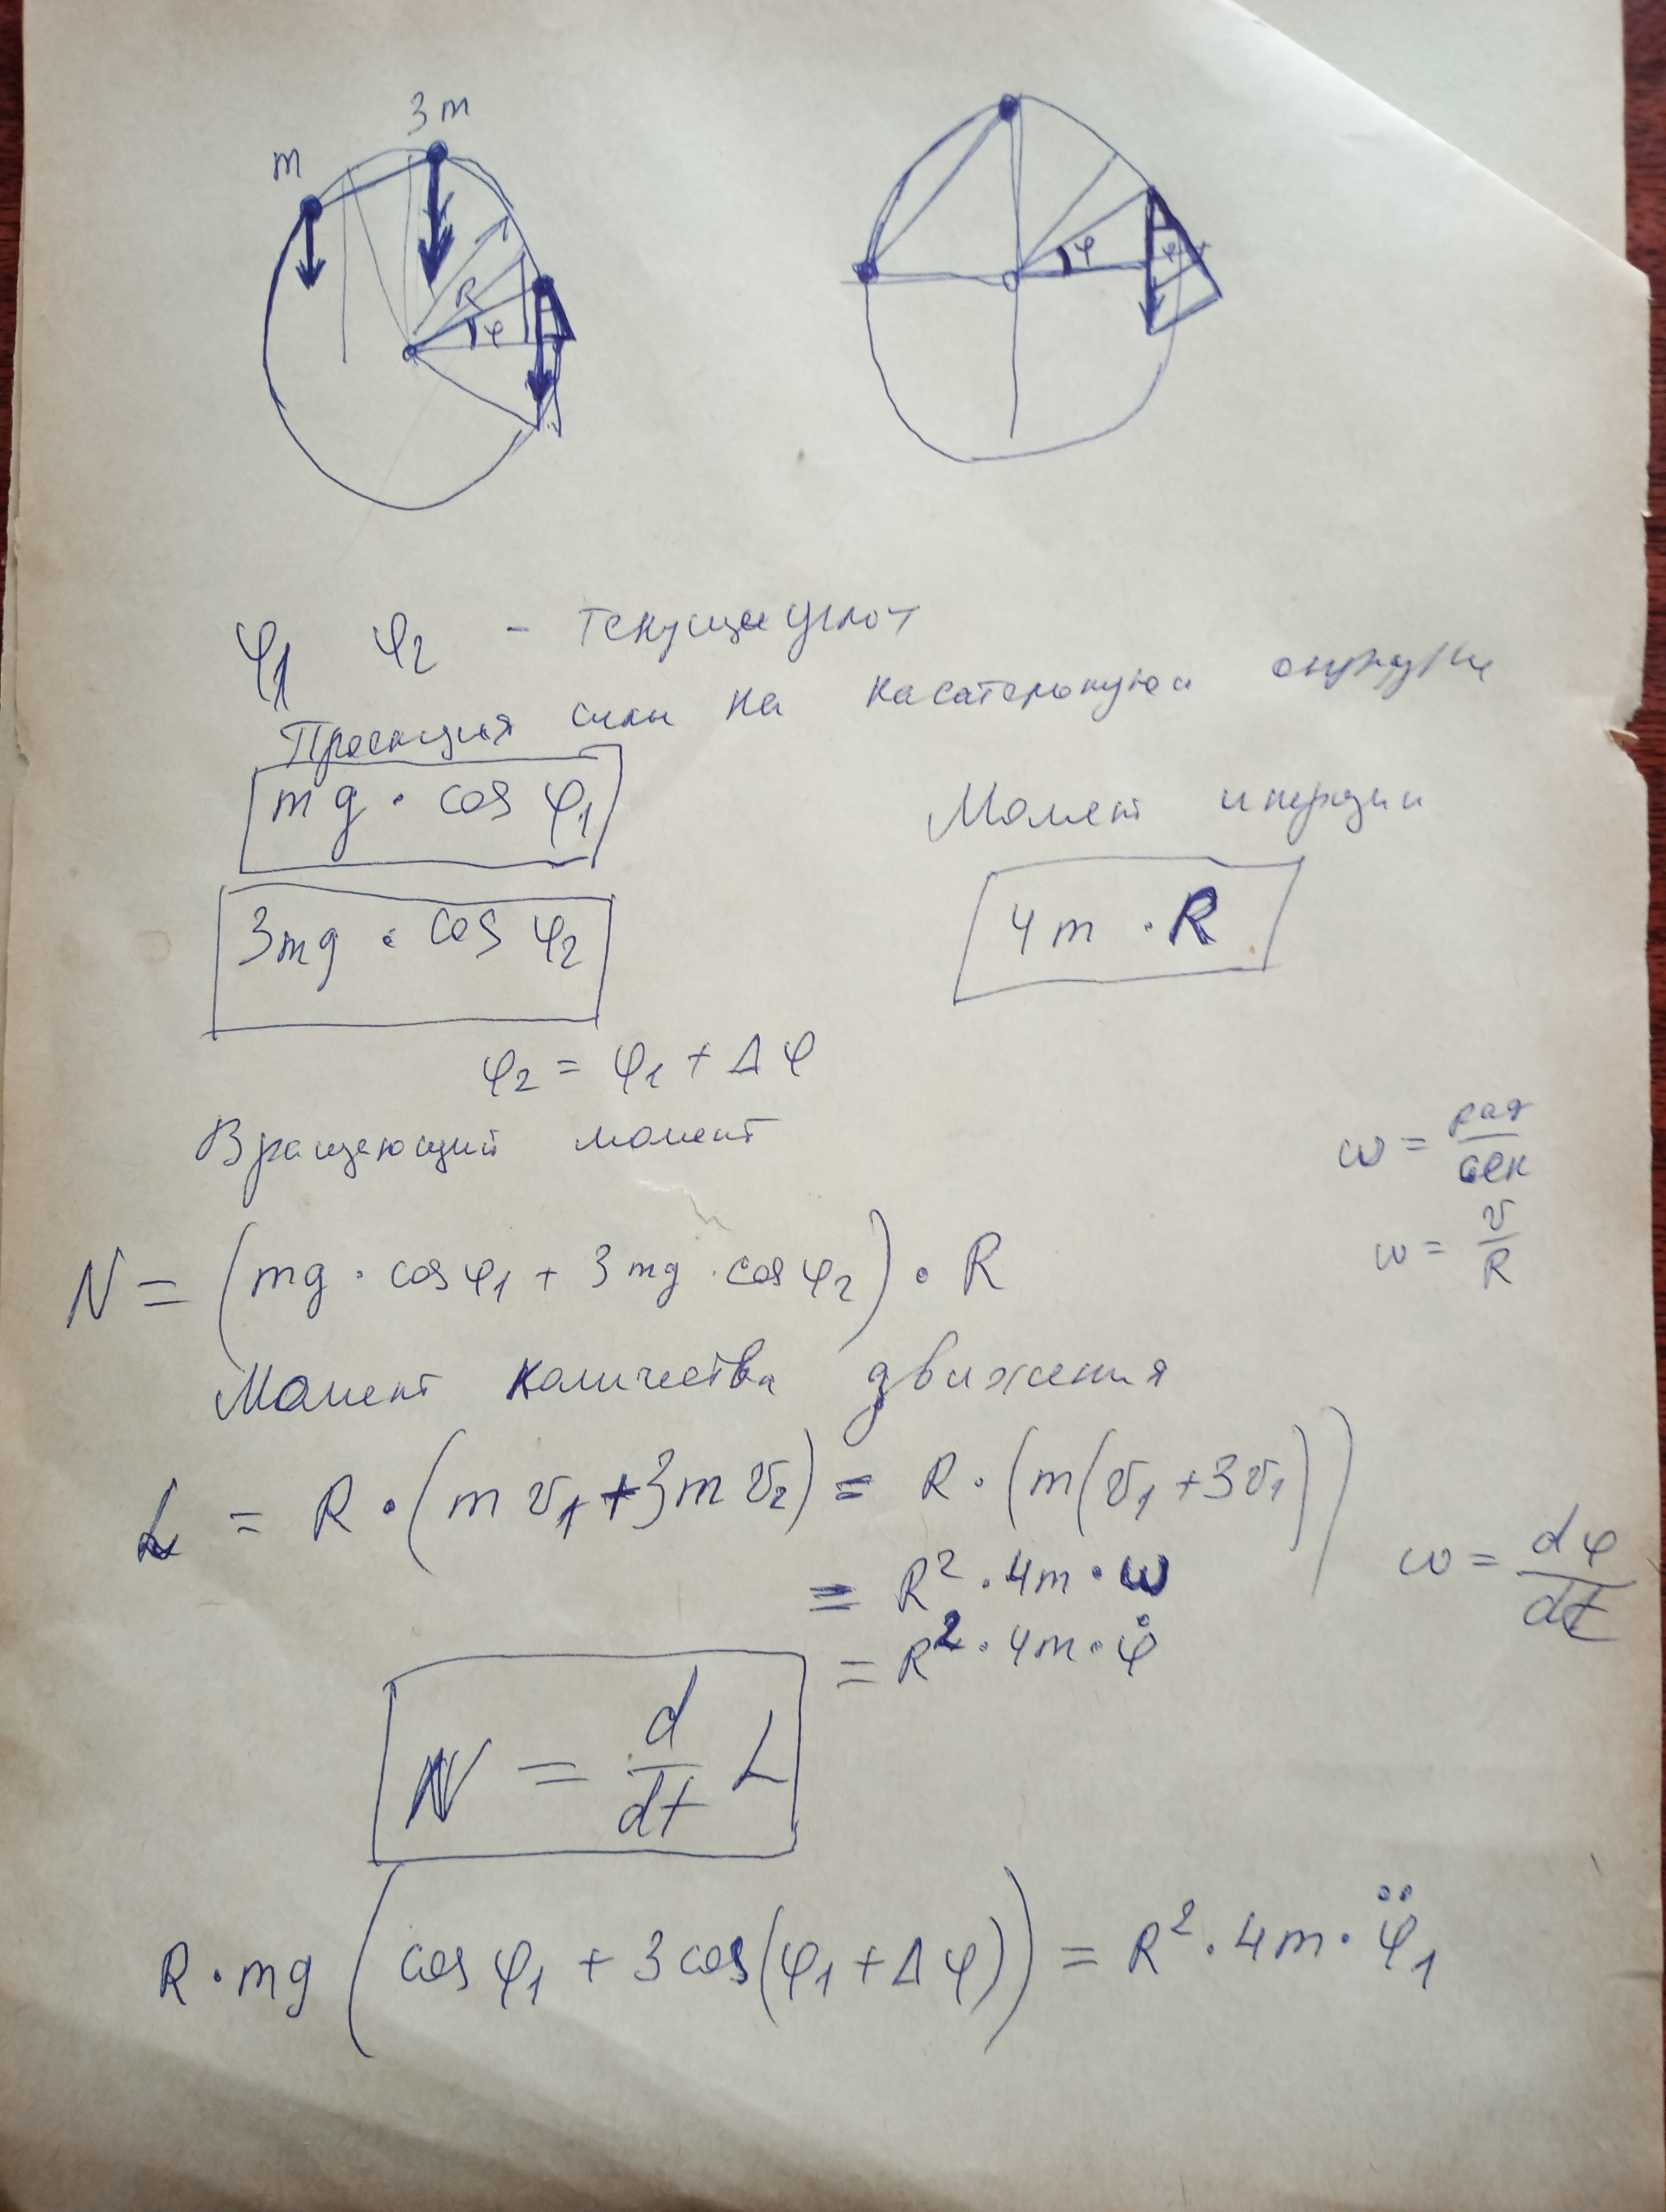

Пусть текущие координаты вантажів масами $m$ і $3m$ равны $\varphi_1$ и $\varphi_2$ соответственно. Причём $\varphi_2 = \varphi_1 + \Delta \varphi$

Радиальная сила, действующая вдоль касательной к окружности равна

$F_R = m g \cdot cos \varphi_1 + 3 m g \cdot cos \varphi_2$

$F_R = m g \cdot (cos \varphi_1 + 3 cos (\varphi_1 + \Delta \varphi))$

Вращающий момент

$N = R \cdot F_R = R \cdot (m g \cdot cos \varphi_1 + 3 m g \cdot cos \varphi_2)$

$N = R \cdot F_R = R \cdot m g \cdot (cos \varphi_1 + 3 cos (\varphi_1 + \Delta \varphi))$

Момент количества движения

$L = R \cdot (m v_R + 3 m v_R) = R^2 \cdot 4 m \cdot \omega = R^2 \cdot 4 m \cdot \dot{\varphi}_1$

Аналог второго закона Ньютона 

$N = \frac{d}{dt}L$

$R \cdot m g \cdot (cos \varphi_1 + 3 cos (\varphi_1 + \Delta \varphi)) = \frac{d}{dt} R^2 \cdot 4 m \cdot \dot{\varphi}_1$

$g \cdot (cos \varphi_1 + 3 cos (\varphi_1 + \Delta \varphi)) = R \cdot 4 \cdot \ddot{\varphi}_1$

$\ddot{\varphi}_1 = \frac{g}{4 \cdot R} \cdot (cos \varphi_1 + 3 cos (\varphi_1 + \Delta \varphi))$

In [16]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))
    
def displ(tex):
    display(Math(tex))

In [92]:
t, g, R, Delta_phi, m = var("t, g, R, Delta_phi, m")
phi_1 = function('phi_1')(t)
de = diff(phi_1,t,2) == g / (4 * R) * (cos(phi_1) + 3 * cos(phi_1 + Delta_phi))
disp(de)
sol = desolve(de, phi_1, ivar = t, contrib_ode = True, show_method=True)
disp(sol[0][0])
disp(sol[0][1])
print(sol[1])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

freeofx


Let

$\omega = \dot{\varphi}$

then we have system of first order ode

$\dot{\varphi} = \omega$

$\dot{\omega} = \frac{g}{4 \cdot R} \cdot (cos \varphi + 3 cos (\varphi + \Delta \varphi))$

In [93]:
t, g, R, Delta_phi, m = var("t, g, R, Delta_phi, m")
phi_1 = function('phi_1')(t)
omega_1 = function('omega_1')(t)

des = [
    diff(phi_1, t) == omega_1,
    diff(omega_1,t) == g / (4 * R) * (cos(phi_1) + 3 * cos(phi_1 + Delta_phi))
]
disp(de)
sol = desolve_system(des, [phi_1, omega_1], ivar = t)
disp(sol[0])
disp(sol[1])
print(sol)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[phi_1(t) == ilt(1/4*(4*R*g14218*phi_1(0) + 3*g*laplace(cos(Delta_phi + phi_1(t)), t, g14218) + g*laplace(cos(phi_1(t)), t, g14218))/(R*g14218^2), g14218, t), omega_1(t) == ilt(1/4*(3*g*laplace(cos(Delta_phi + phi_1(t)), t, g14218) + g*laplace(cos(phi_1(t)), t, g14218))/(R*g14218), g14218, t)]


In [94]:
sol = desolve_system(des, [phi_1, omega_1], ivar = t, ics=[0,0,0])
disp(sol[0])
disp(sol[1])
print(sol)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[phi_1(t) == ilt(1/4*(3*g*laplace(cos(Delta_phi + phi_1(t)), t, g14455) + g*laplace(cos(phi_1(t)), t, g14455))/(R*g14455^2), g14455, t), omega_1(t) == ilt(1/4*(3*g*laplace(cos(Delta_phi + phi_1(t)), t, g14455) + g*laplace(cos(phi_1(t)), t, g14455))/(R*g14455), g14455, t)]


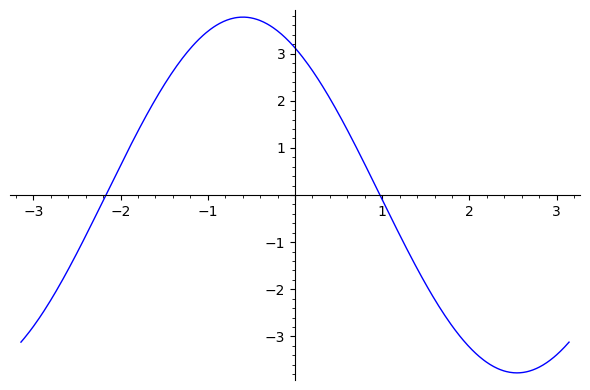

In [114]:
plot(((cos(x) + 3 * cos(x + pi/4))), x, -pi, pi)

In [107]:
phi1 = var('phi1')
omega1 = var('omega1')

sb = [phi_1 == phi1, omega_1 == omega1, g == 10, R == 1, Delta_phi == pi/4]

In [103]:
f = [de_i.rhs().subs(sb) for de_i in des]
f

[omega1, 10*cos(phi1)]

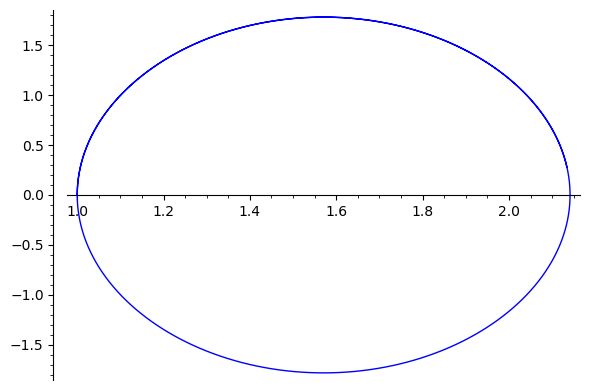

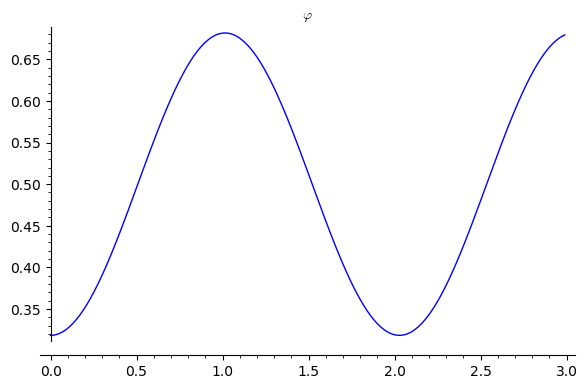

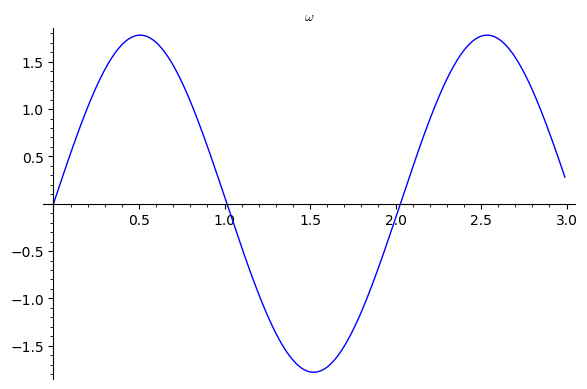

In [115]:
times = srange(0,3,0.01)
sol = desolve_odeint(des=f, ics=[1,0], times=times, dvars=[phi1, omega1], ivar=t)
p = line(zip(sol[:,0],sol[:,1]))
p.show()

p = line(zip(times,sol[:,0]/pi))
p.show(title="$\\varphi$")

p = line(zip(times,sol[:,1]))
p.show(title="$\\omega$") 

2. Додайте сухе тертя в систему з задачі 1, ввівши однаковий коефіцієнт тертя $\mu$ між
вантажами і площиною. Отримайте рівняння Ньютона, розв’яжіть їх.

3. Розв’яжіть задачу 1 в підході Лагранжа, записавши функцію Лагранжа, рівняння
Ейлера-Лагранжа і розв’язавши їх.

$U = R\,m\,g \cdot (sin \varphi_1 + 3 sin (\varphi_1 + \Delta \varphi))$

$T = \frac{(m v_R^2 + 3 m v_R^2)}{2} = 2 m v_R^2 = 2\,m \cdot \omega^2 R^2 = 2\,m \cdot \dot{\varphi}_1^2 R^2$

In [31]:
T = 2*m*diff(phi_1,t)^2 * R^2
disp(T)

<IPython.core.display.Math object>

In [32]:
phi = var('phi')
U = m*g * R * (sin(phi) + 3 * sin(phi + Delta_phi))
disp(U)

<IPython.core.display.Math object>

$L = T - U = 2\,m \cdot \dot{\varphi}_1^2 R^2 - R\,m\,g \cdot (sin \varphi_1 + 3 sin (\varphi_1 + \Delta \varphi))$

$\frac{d}{dt}\frac{\partial L}{\partial \dot{\varphi}} - \frac{\partial L}{\partial {\varphi}} = 0$

$\frac{\partial L}{\partial \dot{\varphi}} = 4\,m \cdot \dot{\varphi}_1 R^2$

$\frac{\partial L}{\partial {\varphi}} =$

In [33]:
dLdphi = U.diff(phi)
disp(dLdphi)

<IPython.core.display.Math object>

$\frac{d}{dt}(4\,m \cdot \dot{\varphi}_1 R^2) - R g m {\left(3 \, \cos\left(\Delta_{\phi} + \phi\right) + \cos\left(\phi\right)\right)} = 0$


$\ddot{\varphi}_1 = \frac{g}{4 \cdot R} \cdot (cos \varphi_1 + 3 cos (\varphi_1 + \Delta \varphi))$

7. Функция Лагранжа має вигляд $L = 3 \dot{x}^2 - 2 x^2 + 4 x \dot{x}\,sin x$. Знайдіть закон руху системи. Чи впливає на нього останній доданок у функції Лагранжа?

In [27]:
# Объявление переменных и функций
t = var("t")

V = var("v")
v = function("v")(t)

X = var("x")
x = function("x")(t)

P = var("p")
p = function("p")(t)

уравнения Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial {x}} = 0$

In [26]:
def EulerLagrengeEquation(L):
    displ("L = " + latex(L))

    # в Лагранжиане производим замену производных обобщенных координат на v
    # Найдем обобщенные импульсы
    P1 = L.subs(x.diff(t) == V).diff(V).subs(V == x.diff(t))
    displ("P = " + latex(P1))

    # Найдем обобщенные силы
    F1 = L.subs(x == X).diff(X).subs(X == x)
    displ("F = " + latex(F1))

    displ("\\frac{d}{dt}\\frac{\\partial L}{\\partial \\dot{x}} = " + latex(P1.diff(t)))

    # Запишем уравнения Эйлера-Лагранжа
    de1 = P1.diff(t) - F1 == 0
    disp(de1.full_simplify())

    return de1

In [28]:
L = 3 * x.diff(t)^2 - 2 * x^2 + 4 * x * x.diff(t) * sin (x)
EulerLagrengeEquation(L)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

4*x(t) + 6*diff(x(t), t, t) == 0

In [30]:
L = 3 * x.diff(t)^2 - 2 * x^2
EulerLagrengeEquation(L)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

4*x(t) + 6*diff(x(t), t, t) == 0

In [29]:
L = 4 * x * x.diff(t) * sin (x)
EulerLagrengeEquation(L)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0 == 0

останній доданок у функції Лагранжа на закон руху системи не впливає

8. На тіло масою m діє сила $F = - kx - \alpha \dot{x}^2$. Знайдіть закон руху тіла. Який фызичний смисл ви можете надати такому виразу для сили?

$\frac{m}{2} \dot{x}^2 = - kx - \alpha \dot{x}^2$

$\left(\frac{m}{2} + \alpha\right) \dot{x}^2 + kx = 0$

Физический смысл - осциллятор с диссипацией квадратично зависящей от скорости, по итогу такая диссипация оборачивается дополнительной массой, Это похоже либо на релятивисткую поправку либо на электромагнитную массу электрического заряда